In [1]:
#install the dependencies
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavanikalyanipedda","key":"03ee0cdf2358c207b84cb43f8a7cd3e6"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 94% 62.0M/66.0M [00:00<00:00, 110MB/s]
100% 66.0M/66.0M [00:00<00:00, 122MB/s]


In [6]:
#extract zip
from zipfile import ZipFile
file_name = "creditcardfraud.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')



Done


In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dateutil import parser


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier

#Machine Learning packages
from sklearn.svm import SVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder	
from sklearn.metrics import confusion_matrix

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#deep learning libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


RANDOM_SEED = 42


import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [8]:
data = pd.read_csv("creditcard.csv")

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
#Separating Feature and Target matrices
X = data.drop(['Class'], axis=1)
Y=data['Class']

In [11]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size =0.3,random_state=42)

### **Function definition**

In [12]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [13]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Unbalanced data Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    print(cm[1][0])

### **PERFORM PREDICTIONS USING MACHINE LEARNING ALGORITHMS**

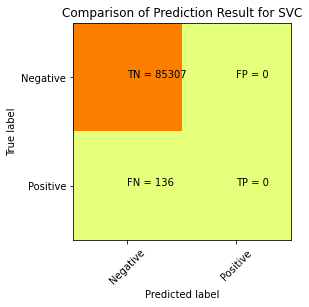

136
Accuracy of the Model SVC 99.8%


In [ ]:
from sklearn.svm import SVC,NuSVC  #Import packages related to Model
Model = "SVC"
model=SVC() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_SVC=np.array(model.predict(X_test))
print('SVC:')
print(classification_report(y_test,y_pred_SVC))

In [ ]:
print(X_train)

            Time        V1        V2  ...       V27       V28   Amount
2557      2105.0 -2.289565 -0.480260  ...  0.392241 -0.147757     1.00
247823  153702.0 -0.313717 -4.064342  ... -0.290331  0.110360  1194.28
152342   97283.0 -1.809763 -0.567439  ... -0.062385  0.088079    75.00
103385   68628.0  1.192319  0.178575  ... -0.016956  0.011937     1.98
8771     11951.0 -0.963451  0.700311  ...  0.349708  0.216207    37.31
...          ...       ...       ...  ...       ...       ...      ...
119879   75618.0  1.173488  0.100792  ... -0.020922  0.003967     1.98
259178  159000.0 -0.775981  0.144023  ...  0.066006  0.137056    89.23
131932   79795.0 -0.146609  0.992946  ... -0.121139 -0.196195     3.94
146867   87931.0 -2.948638  2.354849  ...  0.496912  0.335822     1.00
121958   76381.0  1.233174 -0.784851  ...  0.001217  0.038588   113.00

[199364 rows x 30 columns]


In [ ]:
print(y_train)

2557      0
247823    0
152342    0
103385    0
8771      0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: Class, Length: 199364, dtype: int64


In [ ]:
#from sklearn.svm import SVC,NuSVC  #Import packages related to Model
#Model = "NuSVC"
#model=NuSVC()#Create the Model

#train_test_ml_model(X_train,y_train,X_test,Model)

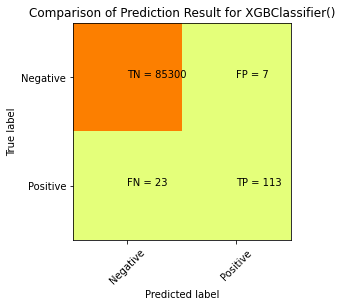

23
Accuracy of the Model XGBClassifier() 100.0%
XGBClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.83      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [24]:
from xgboost import XGBClassifier  #Import packages related to Model
Model = "XGBClassifier()"
model=XGBClassifier() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_XGB=np.array(model.predict(X_test))
print('XGBClassifier:')
print(classification_report(y_test,y_pred_XGB))

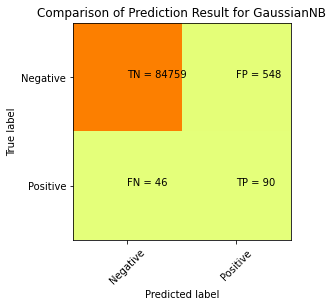

46
Accuracy of the Model GaussianNB 99.3%
GaussianNB:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.14      0.66      0.23       136

    accuracy                           0.99     85443
   macro avg       0.57      0.83      0.61     85443
weighted avg       1.00      0.99      1.00     85443



In [26]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB  #Import packages related to Model
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_GNB=np.array(model.predict(X_test))
print('GaussianNB:')
print(classification_report(y_test,y_pred_GNB))

In [ ]:
# from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
# Model = "SGDClassifier"
# model=SGDClassifier()

# train_test_ml_model(X_train,y_train,X_test,Model)

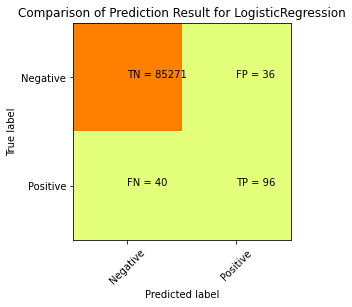

40
Accuracy of the Model LogisticRegression 99.9%
Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.73      0.71      0.72       136

    accuracy                           1.00     85443
   macro avg       0.86      0.85      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [25]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)


#logistic Regresssion Classreport
from sklearn.metrics import classification_report
y_pred_log=np.array(model.predict(X_test))
print('Logistic Regression:')
print(classification_report(y_test,y_pred_log))


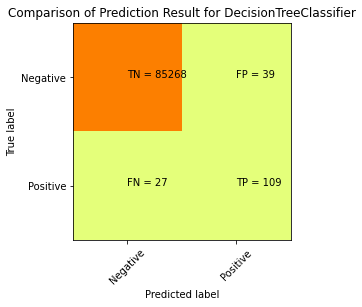

27
Accuracy of the Model DecisionTreeClassifier 99.9%


In [ ]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)


#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_DT=np.array(model.predict(X_test))
print('Decision Tree:')
print(classification_report(y_test,y_pred_DT))

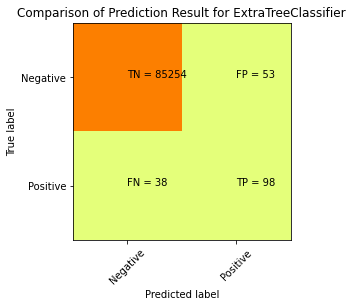

38
Accuracy of the Model ExtraTreeClassifier 99.9%


In [ ]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "ExtraTreeClassifier"
model=ExtraTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)


#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_EX=np.array(model.predict(X_test))
print('ExtraTreeClassifier :')
print(classification_report(y_test,y_pred_EX))

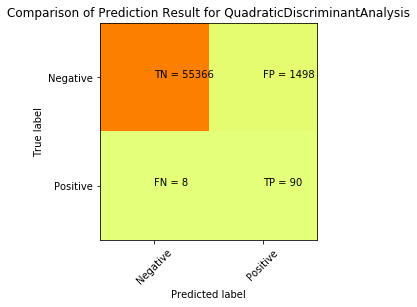

8
Accuracy of the Model QuadraticDiscriminantAnalysis 97.4%


In [ ]:
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
# Model = "QuadraticDiscriminantAnalysis"
# model = QuadraticDiscriminantAnalysis()

# train_test_ml_model(X_train,y_train,X_test,Model)

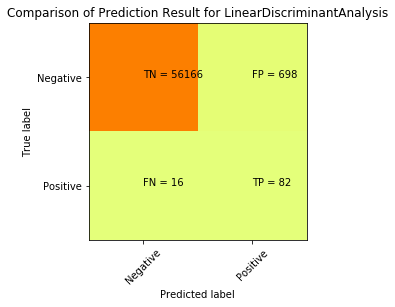

16
Accuracy of the Model LinearDiscriminantAnalysis 98.7%


In [ ]:
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
# Model = "LinearDiscriminantAnalysis"
# model=LinearDiscriminantAnalysis()

# train_test_ml_model(X_train,y_train,X_test,Model)

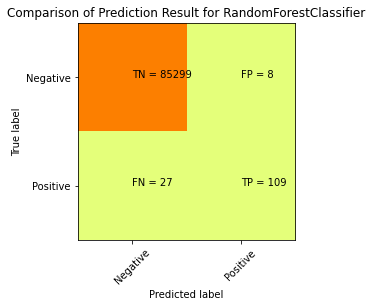

27
Accuracy of the Model RandomForestClassifier 100.0%


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)


#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_RN=np.array(model.predict(X_test))
print('RandomForest:')
print(classification_report(y_test,y_pred_RN))

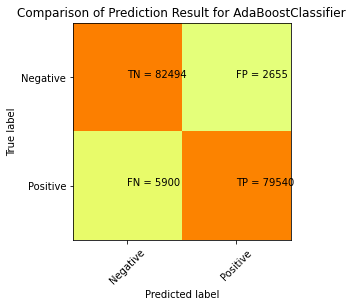

5900
Accuracy of the Model AdaBoostClassifier 95.0%


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "AdaBoostClassifier"
model=AdaBoostClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_ADC=np.array(model.predict(X_test))
print('AdaBoostClassifier:')
print(classification_report(y_test,y_pred_ADC))

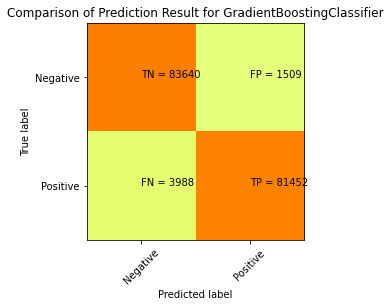

3988
Accuracy of the Model GradientBoostingClassifier 96.8%


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "GradientBoostingClassifier"
model=GradientBoostingClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_GBC=np.array(model.predict(X_test))
print('GradientBoostingClassifier:')
print(classification_report(y_test,y_pred_GBC))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)


#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_KNC=np.array(model.predict(X_test))
print('KNeighborsClassifier:')
print(classification_report(y_test,y_pred_KNC))